In [30]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.dates as mdates


In [31]:
time = ['06:00','06:30','07:00','07:30','08:00','08:30','09:00','09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30','21:00','21:30','22:00','22:30','23:00','23:30']
price = [70.0,70.0,70.0,70.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,120.0,120.0,120.0,120.0,70.0,70.0]
# Convert string times to datetime objects for better handling by matplotlib
time_objects = [datetime.strptime(t, '%H:%M') for t in time]

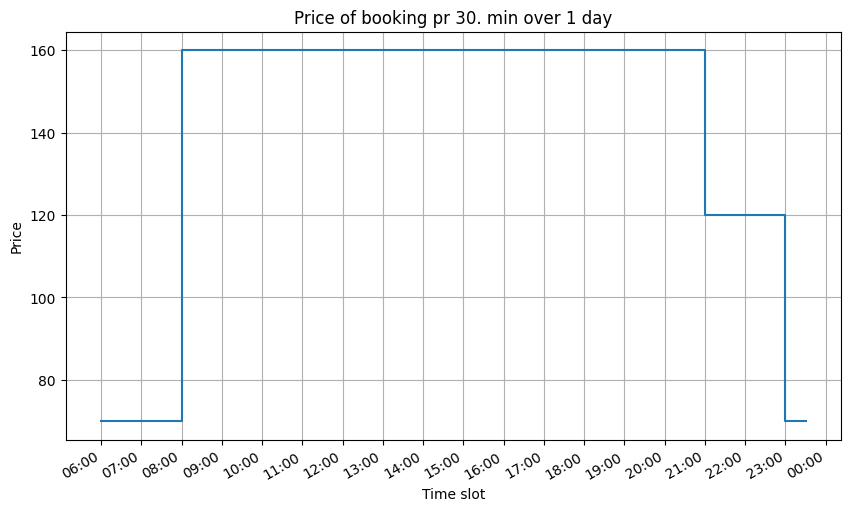

In [32]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.step(time_objects, price, where='post')

# Formatting the x-axis to display time in HH:MM format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotation

plt.xlabel('Time slot')
plt.ylabel('Price')
plt.title('Price of booking pr 30. min over 1 day')

plt.grid(True)
plt.show()

In [33]:
coverage = [0,0,0,0,0,0.25,1,1,1,1,1,1,1,1,0.66,0.75,1,1,1,1,1,1,1,1,0.75,0.5,0.5,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0,0]

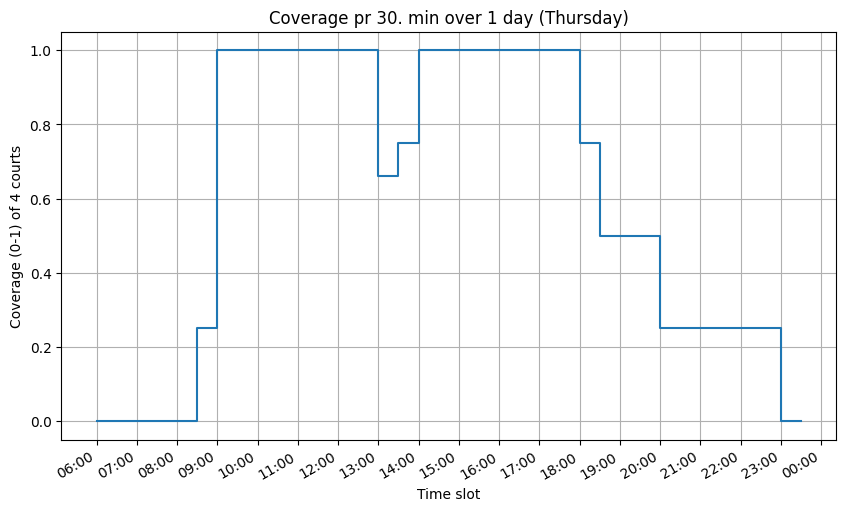

In [34]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.step(time_objects, coverage, where='post')

# Formatting the x-axis to display time in HH:MM format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotation

plt.xlabel('Time slot')
plt.ylabel('Coverage (0-1) of 4 courts')
plt.title('Coverage pr 30. min over 1 day (Thursday)')

plt.grid(True)
plt.show()

In [35]:
# Load the Excel file
file_path = 'COURT_BOOKINGS2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Datetime,y,Booking %,Price (pr half hour),Skalar
0,2024-03-28 06:00:00,0.0,0.0,70,1.0
1,2024-03-28 06:30:00,0.0,0.0,70,NaN
2,2024-03-28 07:00:00,0.0,0.0,70,NaN
3,2024-03-28 07:30:00,0.0,0.0,70,NaN
4,2024-03-28 08:00:00,0.0,0.0,160,NaN


In [36]:
# Convert 'Datetime' column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract the weekday name from the 'Datetime' column
data['Weekday'] = data['Datetime'].dt.day_name()

# Group by weekday and time, then calculate the average 'Booking %' for each group
grouped_data = data.groupby([data['Datetime'].dt.time, 'Weekday'])['Booking %'].mean().unstack().fillna(0)

# Check the structured data
grouped_data.head()

Weekday,Saturday,Sunday,Thursday,Wednesday
Datetime,,,,
06:00:00,0.00,0.00,0.166667,0.0
06:30:00,0.00,0.00,0.416667,0.0
07:00:00,0.00,0.00,0.666667,0.5
07:30:00,0.25,0.00,0.666667,0.5
08:00:00,0.75,0.25,0.416667,0.5


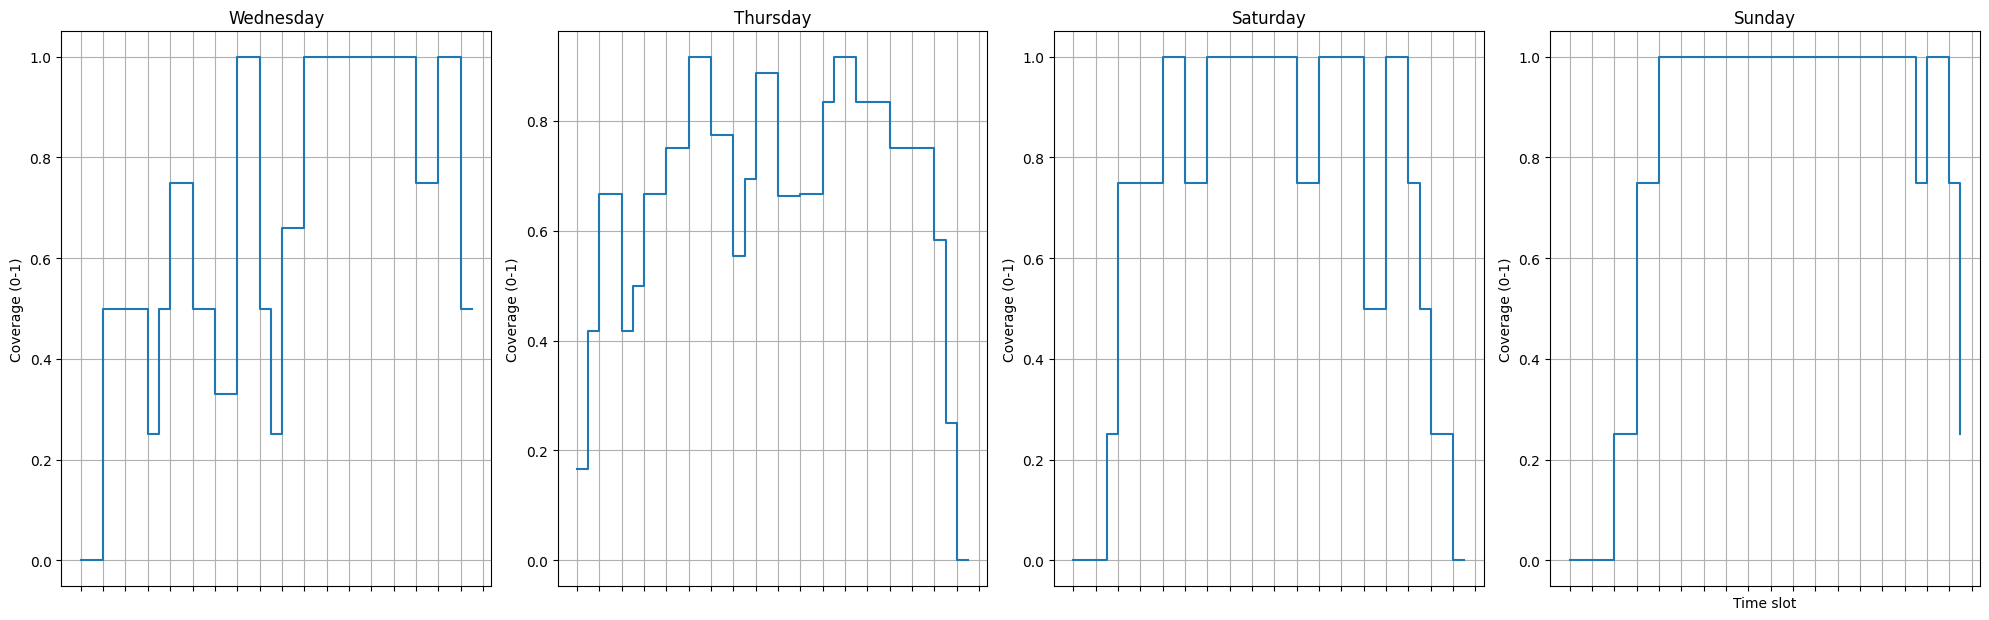

In [37]:
# Define the correct order for the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the columns of the dataframe according to the weekday order
# Only include the columns that exist in our dataframe to handle missing weekdays
ordered_grouped_data = grouped_data[[day for day in weekday_order if day in grouped_data.columns]]

# Create a figure for the subplots
fig = plt.figure(figsize=(20, 12))

# Create a subplot for each weekday using subplot2grid
for i, (weekday, coverage) in enumerate(ordered_grouped_data.items()):
    # Determine the row and column index based on the weekday's position
    row = i // 4
    col = i % 4

    # Adjust column index for the second row to center the plots
    if row == 1:
        col += 0.5  # Adjust to center the bottom 3 plots under the top 4

    ax = plt.subplot2grid((2, 4), (row, int(col)), fig=fig)
    
    ax.step(time_objects, coverage, where='post')
    
    # Formatting the x-axis to display time in HH:MM format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    fig.autofmt_xdate()  # Rotation
    
    ax.set_xlabel('Time slot')
    ax.set_ylabel('Coverage (0-1)')
    ax.set_title(f'{weekday}')

    ax.grid(True)
    

plt.tight_layout()
plt.savefig('plots/7_day_coverage.png')
plt.show()


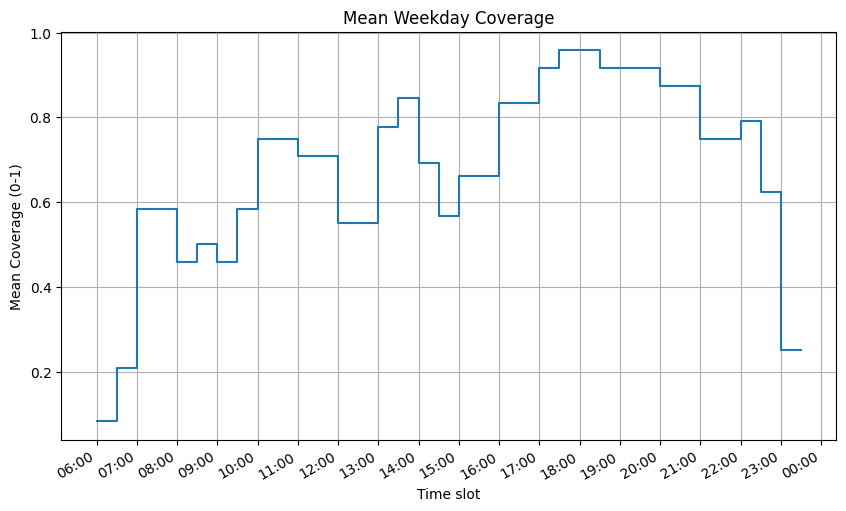

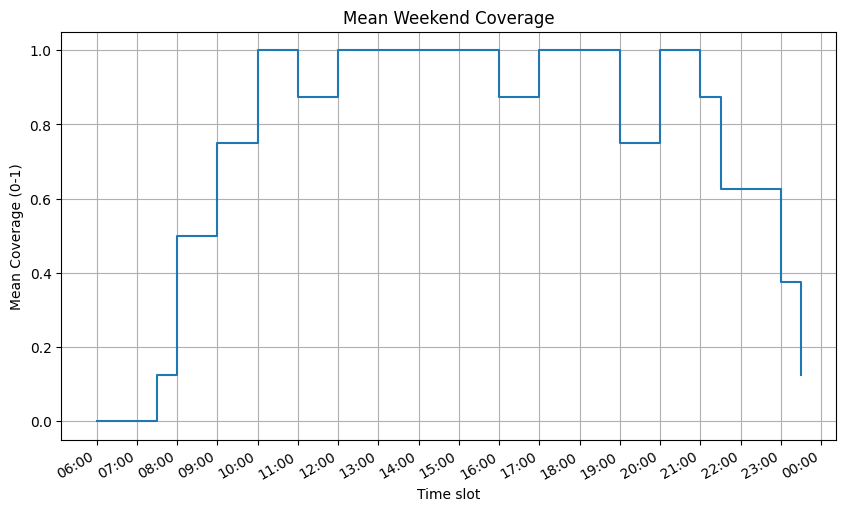

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Define the correct order for weekdays and weekends
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend_order = ['Saturday', 'Sunday']

# Function to plot mean coverage
def plot_mean_coverage(days, title):
    # Filter the dataframe for the given days and calculate the mean
    mean_coverage = grouped_data[[day for day in days if day in grouped_data.columns]].mean(axis=1)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.step(time_objects, mean_coverage, where='post')
    
    # Formatting the x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    fig.autofmt_xdate()  # Rotation
    
    ax.set_xlabel('Time slot')
    ax.set_ylabel('Mean Coverage (0-1)')
    ax.set_title(title)

    ax.grid(True)
    
    plt.show()

# Ensure grouped_data is a dataframe with columns for each day of the week and rows for time slots
# Ensure time_objects is a list/array of datetime objects corresponding to the time slots

# Plot Mean Weekdays Coverage
plot_mean_coverage(weekday_order, "Mean Weekday Coverage")

# Plot Mean Weekends Coverage
plot_mean_coverage(weekend_order, "Mean Weekend Coverage")


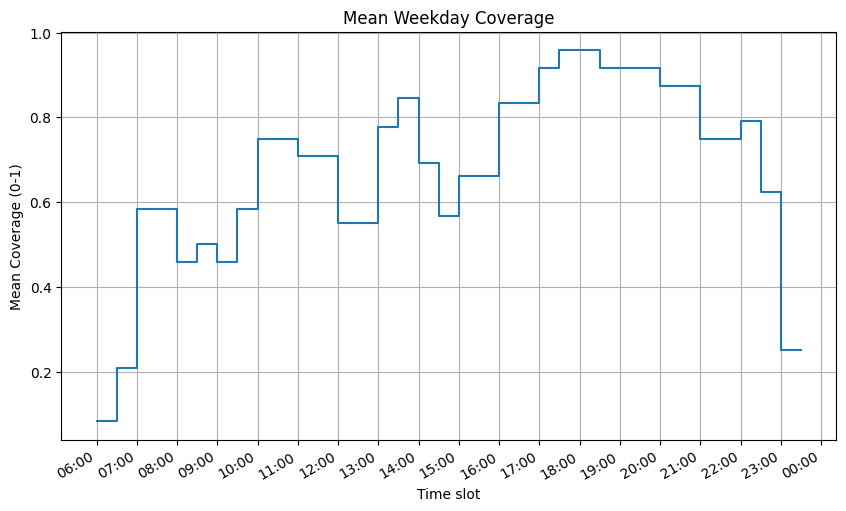

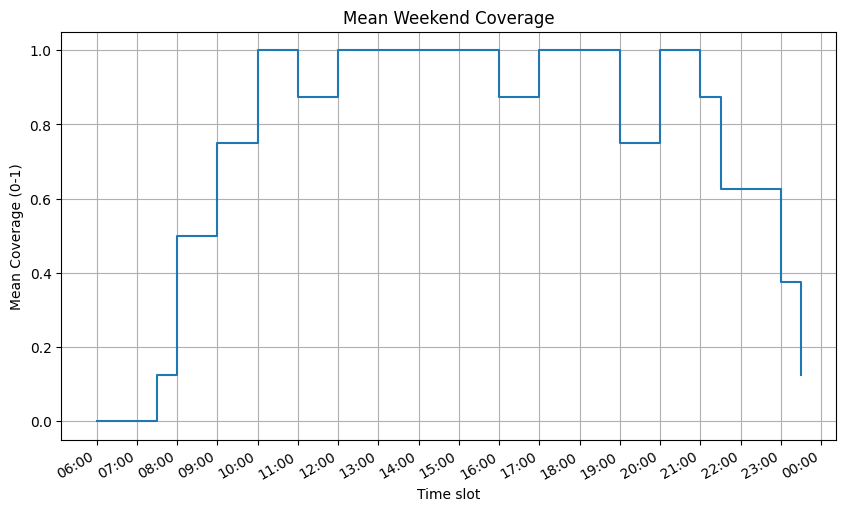

In [39]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the 'plots' directory exists
plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

# Define the correct order for weekdays and weekends
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend_order = ['Saturday', 'Sunday']

# Function to plot and save mean coverage
def plot_mean_coverage(days, title, filename):
    # Filter the dataframe for the given days and calculate the mean
    mean_coverage = grouped_data[[day for day in days if day in grouped_data.columns]].mean(axis=1)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.step(time_objects, mean_coverage, where='post')
    
    # Formatting the x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    fig.autofmt_xdate()  # Rotation
    
    ax.set_xlabel('Time slot')
    ax.set_ylabel('Mean Coverage (0-1)')
    ax.set_title(title)

    ax.grid(True)
    
    # Save the plot
    filepath = os.path.join(plots_dir, filename)
    plt.savefig(filepath)
    plt.show()  # Close the figure to free memory

# Plot and Save Mean Weekdays Coverage
plot_mean_coverage(weekday_order, "Mean Weekday Coverage", "mean_weekday_coverage.png")

# Plot and Save Mean Weekends Coverage
plot_mean_coverage(weekend_order, "Mean Weekend Coverage", "mean_weekend_coverage.png")


In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_mean_coverage(weekend_order, "Mean Weekend Coverage", "its_everyday_bro.png")